In [3]:
!pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/96.5 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 1.1 MB/s eta 0:00:00


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
"""
 X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
 X2: Gender (1 = male; 2 = female).
 X3: Education (1 = graduate school; 2 = university; 3 =high school; 4 = others).
 X4: Marital status (1 = married; 2 = single; 3 = others).
 X5: Age (year).
 X6–X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    X6 = the repayment status in September, 2005; 
    X7=the repayment status in August, 2005;
    ...;
    X11 = the repayment status in April, 2005.
    
 The measurement scale for the repayment status is:
 1 =pay duly; 1=payment delay for one month;
 2 =payment delay for two months; ...; 
 8 = payment delay for eight months; 
 9 = payment delay for nine months and above.
 
 X12–X17: Amount of bill statement (NT dollar).
 X12 =amount of bill statement in September, 2005;
 X13 =amount of bill statement in August, 2005;
 ...;
 X17 = amount of bill statement in April, 2005.
 X18–X23: Amount of previous payment (NT dollar).
     X18 = amount paid in September, 2005; 
     X19 = amount paid in August, 2005;
     ...;
     X23 = amount paid in April,2005.
"""


clients = pd.read_excel("C:\\Users\\admin\\OneDrive - Auckland Institute of Studies\\Documents\\AIS\\AI\\DataSet\\default_credit_card_clients\\default_credit_card_clients.xls")
print(len(clients))
clients.head()

30000


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
clients = clients.sort_values(by=['LIMIT_BAL'])
clients.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
3007,3008,10000,2,2,1,24,1,2,2,2,...,4837,5208,5475,0,1600,0,600,500,0,0
18340,18341,10000,2,1,1,23,0,0,0,0,...,1410,9508,8997,1262,1000,1115,9329,331,1000,0
27483,27484,10000,1,3,2,56,2,2,0,0,...,6711,7258,7777,0,1500,2000,2000,2000,2000,0
29052,29053,10000,2,2,3,52,1,4,3,2,...,8610,8325,8441,0,0,900,0,400,900,1
20429,20430,10000,1,1,2,24,2,2,0,0,...,9580,9267,10096,0,1500,2000,700,1500,0,1


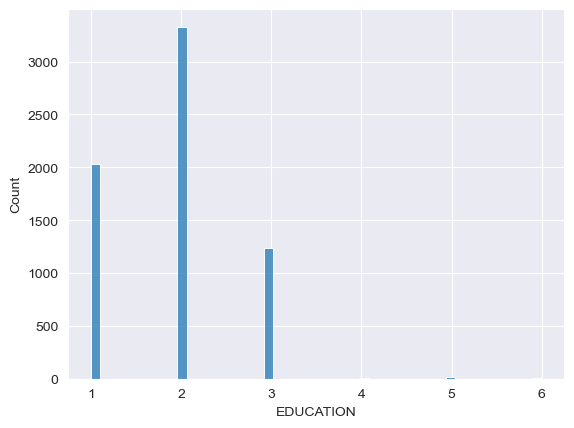

In [8]:
default_clients = clients[clients['DEFAULT']==1]
sns.histplot(data=default_clients, x='EDUCATION')
plt.show()

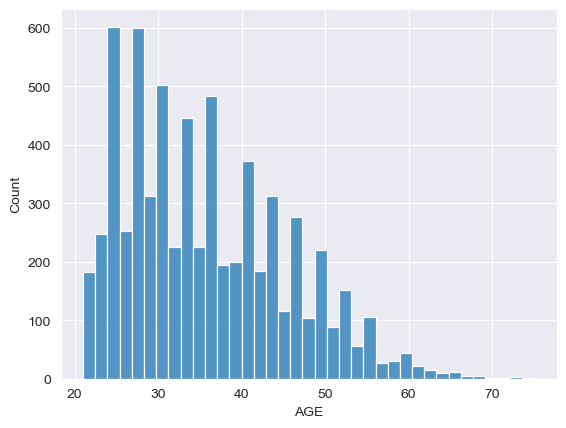

In [10]:
default_clients = clients[clients['DEFAULT']==1]
sns.histplot(data=default_clients, x='AGE')
plt.show()

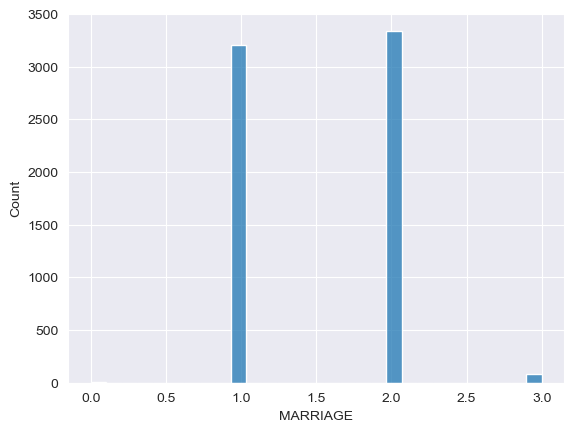

In [11]:
default_clients = clients[clients['DEFAULT']==1]
sns.histplot(data=default_clients, x='MARRIAGE')
plt.show()

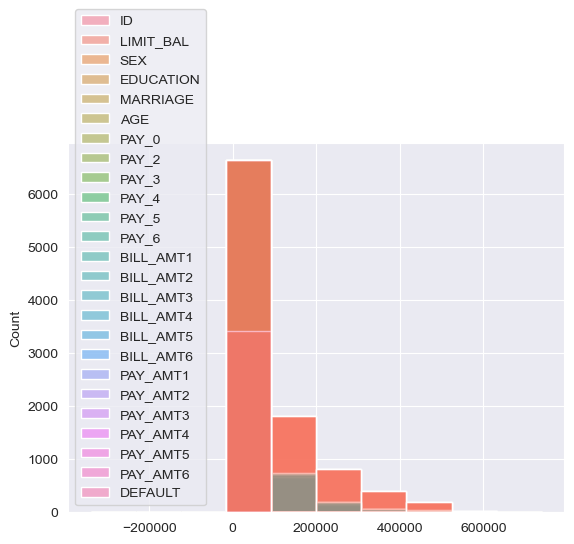

In [18]:
fig,ax = plt.subplots()
sns.histplot(data=default_clients, bins=10, ax=ax, kde=False, label='EDUCATION')
sns.histplot(data=default_clients, bins=10, ax=ax, kde=False, label='AGE')
sns.histplot(data=default_clients, bins=10, ax=ax, kde=False, label='SEX')
sns.histplot(data=default_clients, bins=10, ax=ax, kde=False, label='MARRIAGE')
#plt.legend()
plt.show()

In [20]:
non_default_clients = clients[clients['DEFAULT']==0]
non_default_clients.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
3007,3008,10000,2,2,1,24,1,2,2,2,...,4837,5208,5475,0,1600,0,600,500,0,0
18340,18341,10000,2,1,1,23,0,0,0,0,...,1410,9508,8997,1262,1000,1115,9329,331,1000,0
27483,27484,10000,1,3,2,56,2,2,0,0,...,6711,7258,7777,0,1500,2000,2000,2000,2000,0
2564,2565,10000,2,1,2,23,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3675,3676,10000,2,2,1,25,0,0,0,0,...,9198,9896,9703,1126,1136,316,833,100,292,0


<Axes: xlabel='EDUCATION', ylabel='Count'>

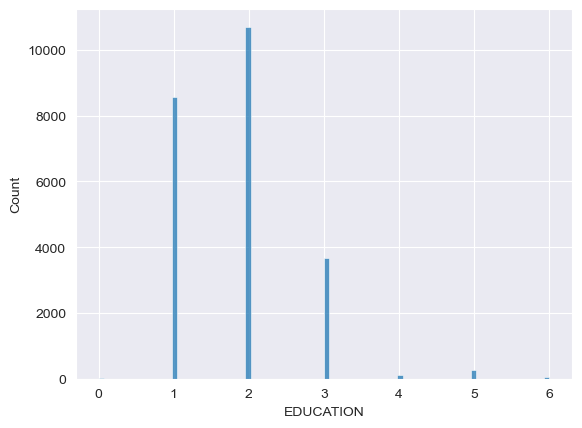

In [21]:
sns.histplot(data=non_default_clients, x='EDUCATION')

<Axes: xlabel='PAY_0', ylabel='BILL_AMT1'>

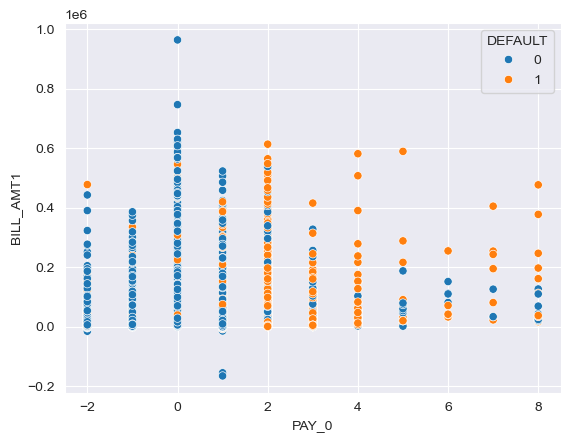

In [24]:
sns.scatterplot(data=clients, x='PAY_0',y='BILL_AMT1', hue='DEFAULT')

<Axes: xlabel='PAY_2', ylabel='BILL_AMT2'>

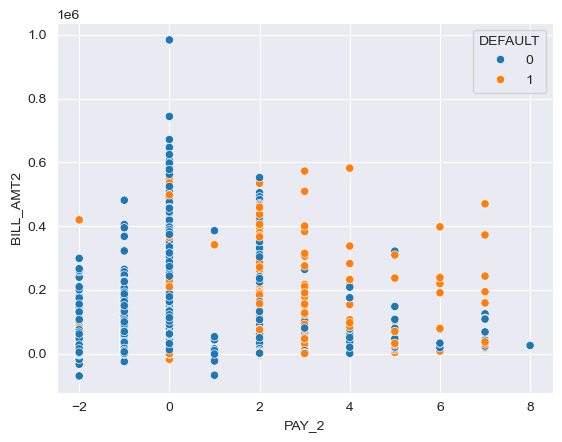

In [25]:
sns.scatterplot(data=clients, x='PAY_2', y='BILL_AMT2', hue='DEFAULT')

<Axes: xlabel='PAY_3', ylabel='BILL_AMT3'>

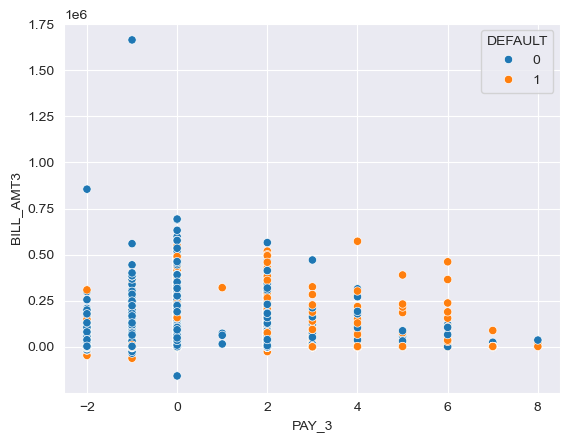

In [26]:

sns.scatterplot(data=clients, x='PAY_3', y='BILL_AMT3', hue='DEFAULT')

<Axes: xlabel='PAY_4', ylabel='BILL_AMT4'>

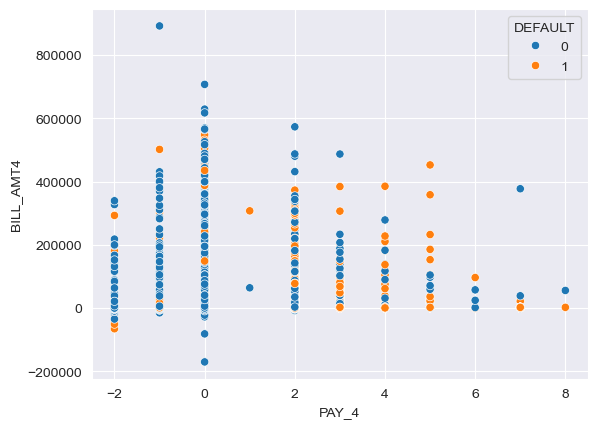

In [27]:
sns.scatterplot(data=clients, x='PAY_4', y='BILL_AMT4', hue='DEFAULT')

<Axes: xlabel='PAY_5', ylabel='BILL_AMT5'>

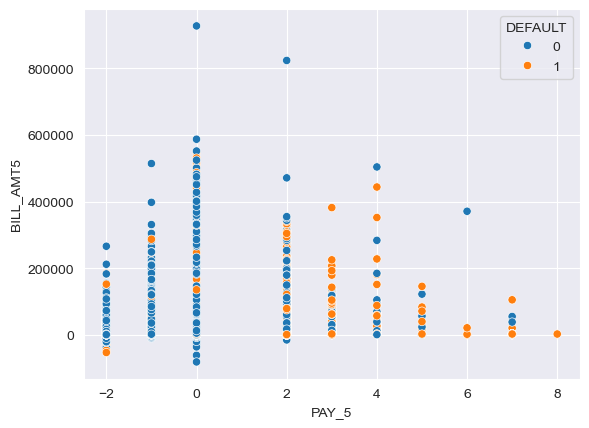

In [28]:
sns.scatterplot(data=clients, x='PAY_5', y='BILL_AMT5', hue='DEFAULT')

<Axes: xlabel='PAY_6', ylabel='BILL_AMT6'>

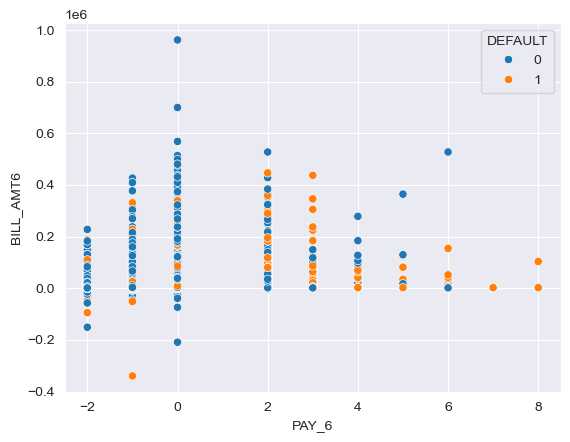

In [29]:
sns.scatterplot(data=clients, x='PAY_6', y='BILL_AMT6', hue='DEFAULT')

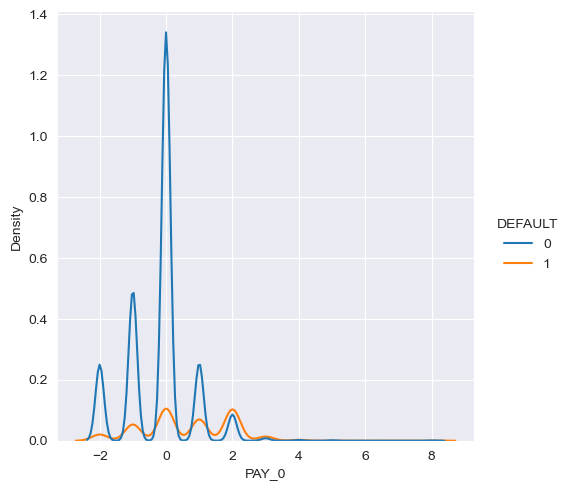

In [33]:

ax = sns.displot(data=clients, x='PAY_0', kind='kde', hue='DEFAULT')
plt.show()

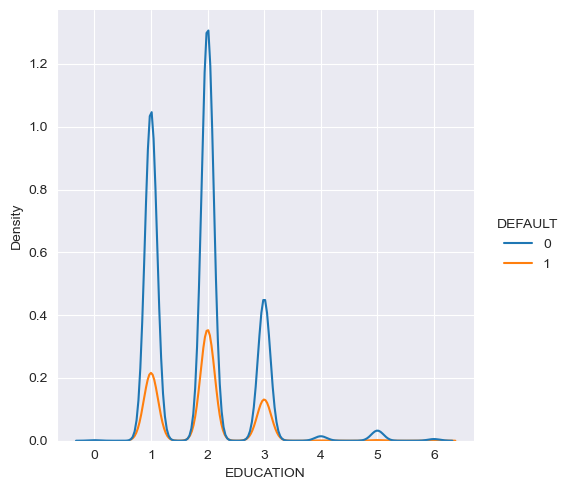

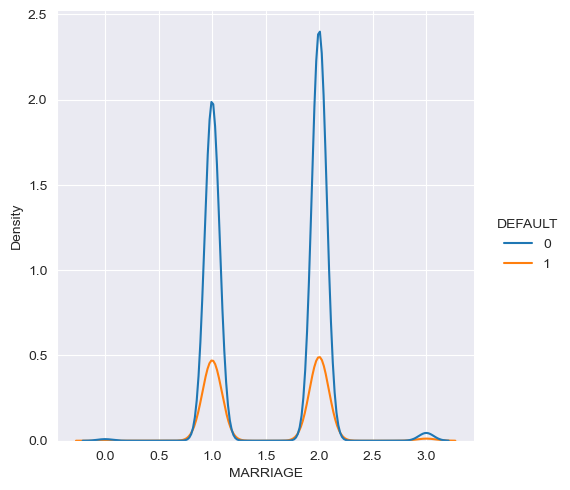

In [40]:
ax = sns.displot(data=clients, x='EDUCATION', kind='kde', hue='DEFAULT')
ax = sns.displot(data=clients, x='MARRIAGE', kind='kde', hue='DEFAULT')

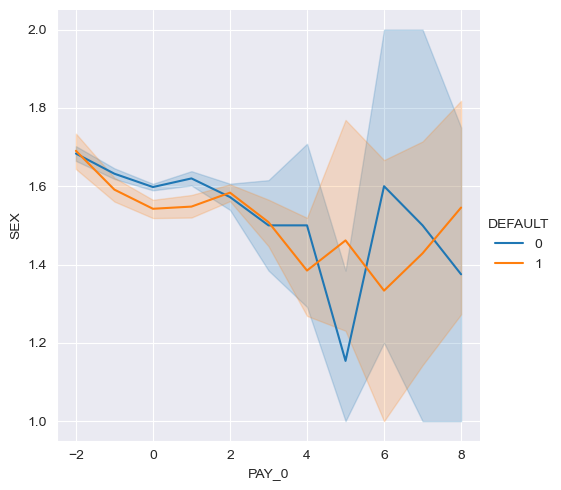

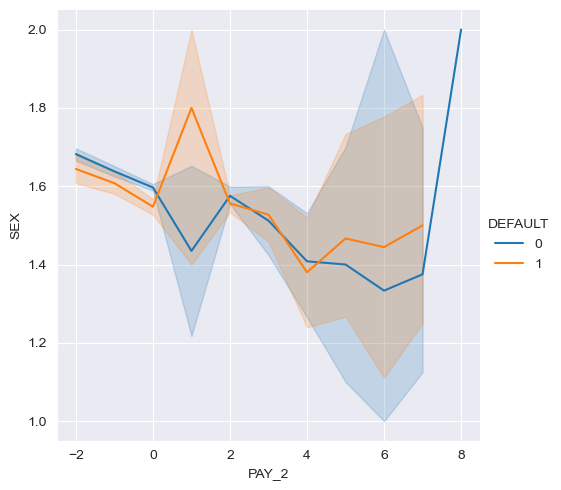

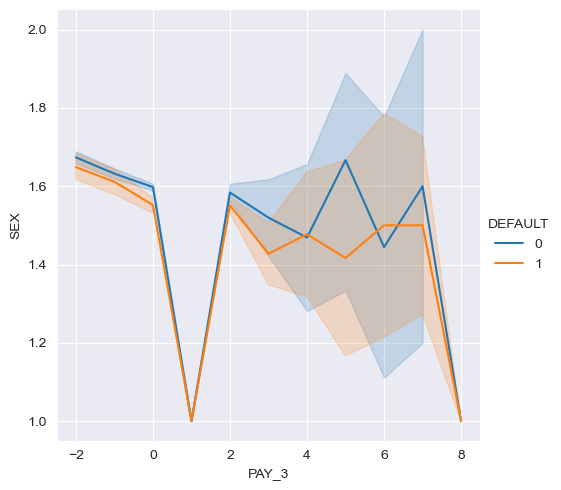

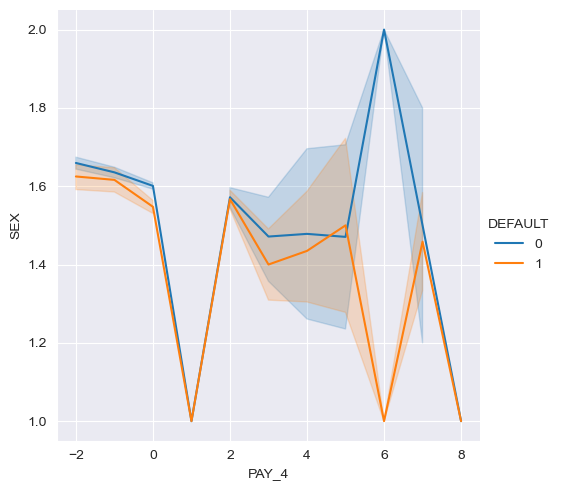

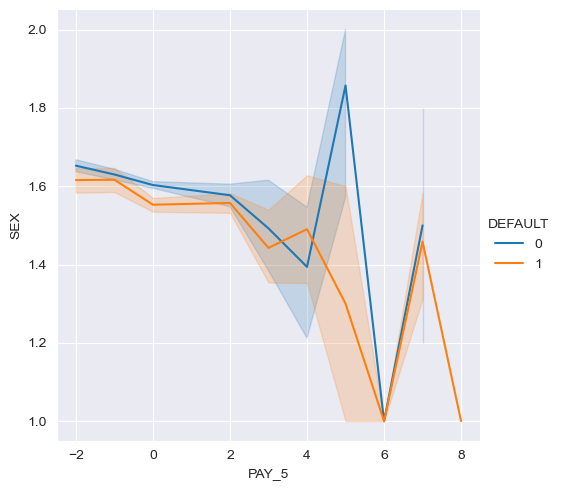

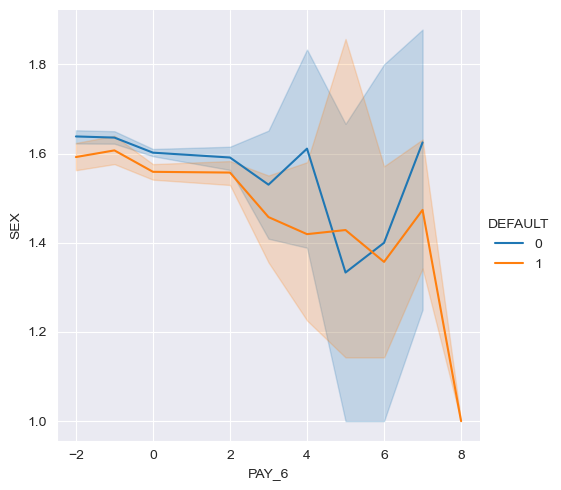

In [41]:
ax = sns.relplot(data=clients, x='PAY_0', y='SEX', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_2', y='SEX', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_3', y='SEX', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_4', y='SEX', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_5', y='SEX', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_6', y='SEX', kind='line', hue='DEFAULT')

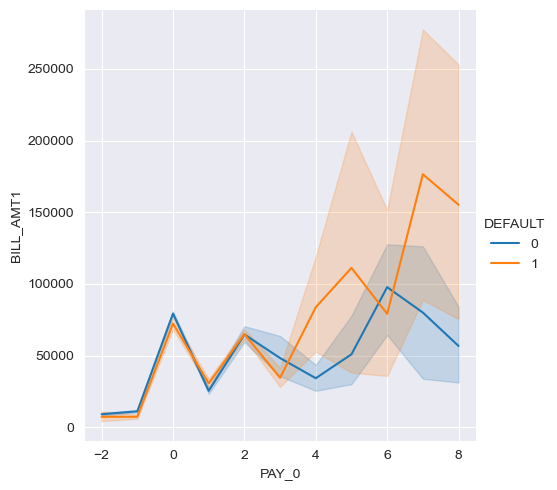

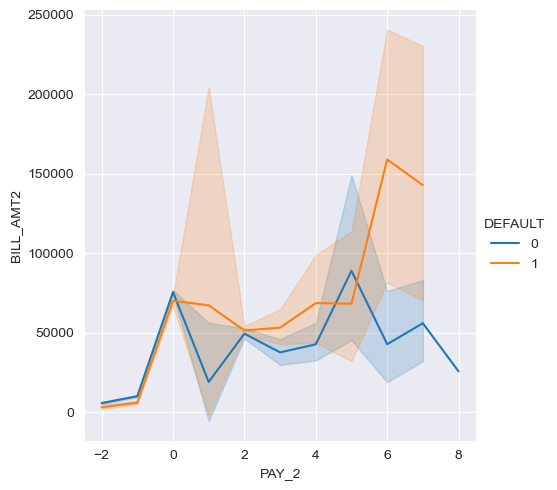

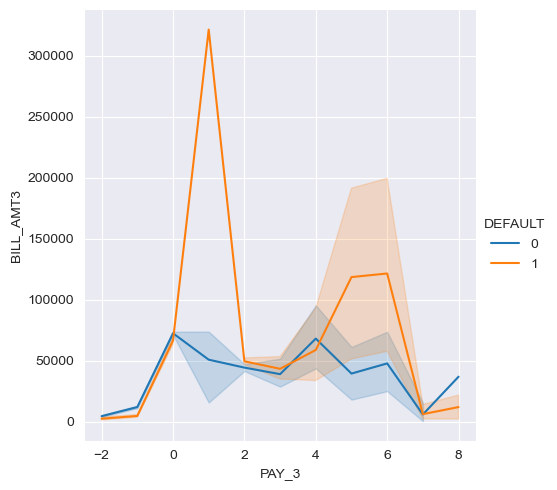

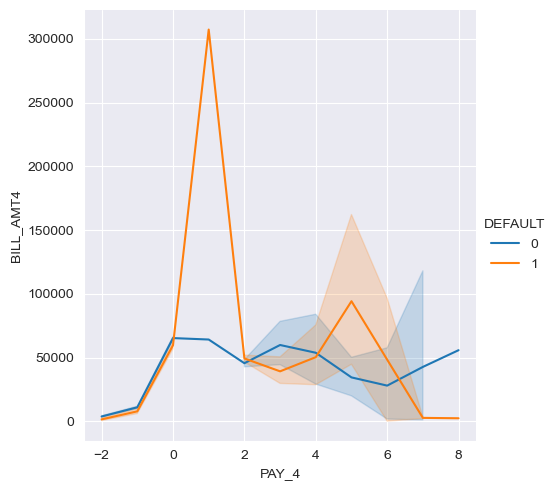

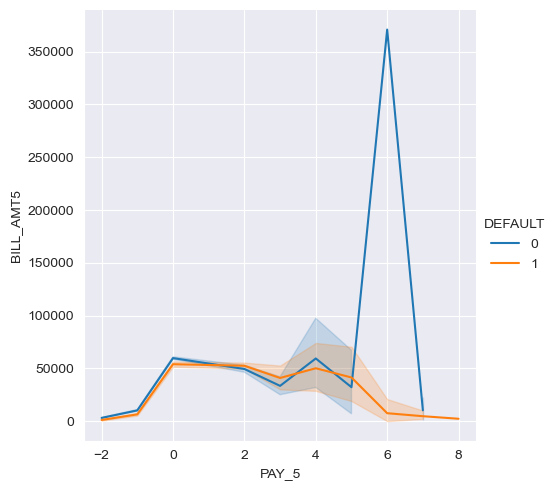

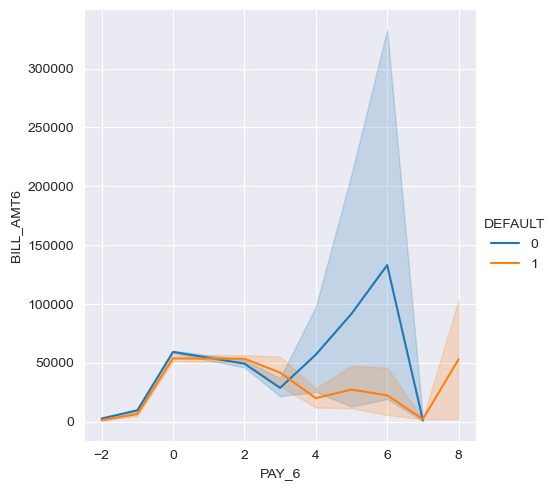

In [39]:
ax = sns.relplot(data=clients, x='PAY_0', y='BILL_AMT1', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_2', y='BILL_AMT2', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_3', y='BILL_AMT3', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_4', y='BILL_AMT4', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_5', y='BILL_AMT5', kind='line', hue='DEFAULT')
ax = sns.relplot(data=clients, x='PAY_6', y='BILL_AMT6', kind='line', hue='DEFAULT')
